Loading yolo11n-pose_ncnn_model for NCNN inference...

image 1/1 /home/hankin/Documents/pose_tracking_on_rknn/demo.jpg: 640x640 1 person, 114.2ms
Speed: 7.1ms preprocess, 114.2ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


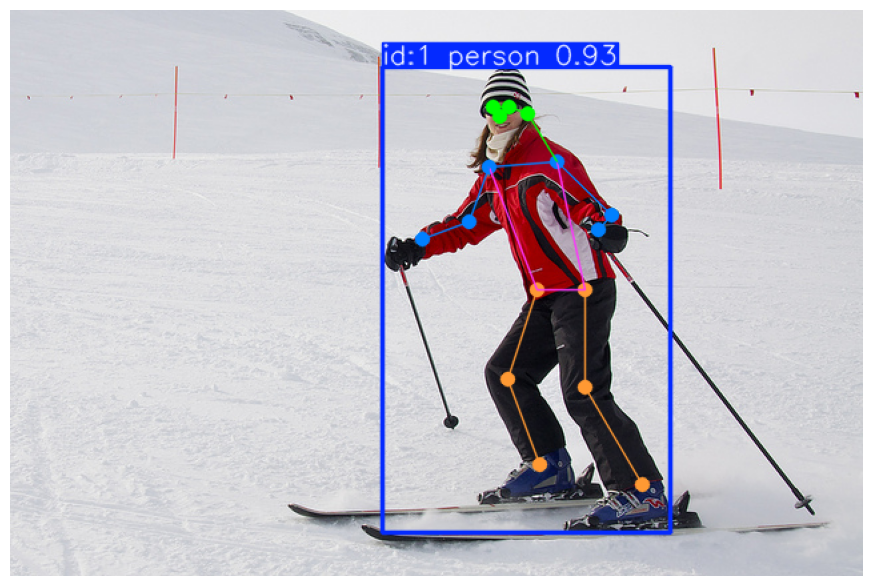

In [1]:
# hello_pose.py
import cv2
from ultralytics import YOLO
import time
import numpy as np

import matplotlib.pyplot as plt

def showimage(image, figsize=(11, 11), title="Image"):
    # Convert BGR to RGB for displaying with matplotlib
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=figsize)
    plt.imshow(image)
    plt.axis('off')
    plt.show()

rknn_model = YOLO("./yolo11n-pose_ncnn_model")

frame = "demo.jpg"
results = rknn_model.track(source=frame, tracker='./bytetrack.yaml', persist=True, conf=0.2, iou=0.5)


last_result = results[0]
annotated_frame = last_result.plot()

showimage(annotated_frame)




In [2]:
last_result.keypoints.data.cpu().numpy()

array([[[        367,       80.25,     0.99414],
        [     374.25,        73.5,     0.98633],
        [     362.25,      73.125,     0.95508],
        [      388.5,      78.125,     0.93262],
        [          0,           0,     0.47314],
        [     410.75,      114.75,     0.99805],
        [     359.75,       118.5,     0.99805],
        [        451,       154.5,     0.99023],
        [     344.25,      159.25,     0.98389],
        [      441.5,         165,     0.98438],
        [     309.25,      172.25,     0.97607],
        [      431.5,      210.75,           1],
        [      395.5,       210.5,           1],
        [        431,       283.5,     0.99902],
        [     373.75,         277,     0.99902],
        [      474.5,      356.25,     0.99414],
        [     397.25,         341,     0.99414]]], dtype=float32)

In [3]:
len(last_result.keypoints.data.cpu().numpy()[0])

17

In [4]:
last_result.boxes.id

tensor([1.])

In [5]:
last_result.boxes

ultralytics.engine.results.Boxes object with attributes:

cls: tensor([0.])
conf: tensor([0.9326])
data: tensor([[279.8750,  43.0000, 495.1250, 392.0000,   1.0000,   0.9326,   0.0000]])
id: tensor([1.])
is_track: True
orig_shape: (425, 640)
shape: torch.Size([1, 7])
xywh: tensor([[387.5000, 217.5000, 215.2500, 349.0000]])
xywhn: tensor([[0.6055, 0.5118, 0.3363, 0.8212]])
xyxy: tensor([[279.8750,  43.0000, 495.1250, 392.0000]])
xyxyn: tensor([[0.4373, 0.1012, 0.7736, 0.9224]])

In [1]:
# debug_servo_direction.py
import time
from ServoPidUtils import servoCar, pid_pan, pid_tilt, pan_angle, tilt_angle, PAN_CHANNEL, TILT_CHANNEL

def move_servo_by_offset(dx, dy):
    global pan_angle, tilt_angle

    delta_pan = pid_pan.update(dx)
    delta_tilt = pid_tilt.update(dy)

    pan_angle += delta_pan
    tilt_angle += delta_tilt

    pan_angle = max(0, min(180, pan_angle))
    tilt_angle = max(0, min(180, tilt_angle))

    print(f"[DEBUG] dx={dx}, dy={dy} -> delta_pan={delta_pan:.2f}, delta_tilt={delta_tilt:.2f}")
    print(f"         pan_angle={pan_angle:.1f}, tilt_angle={tilt_angle:.1f}")

    servoCar.set_servo(PAN_CHANNEL, pan_angle)
    servoCar.set_servo(TILT_CHANNEL, tilt_angle)

if __name__ == '__main__':
    print("开始调试舵机方向")
    print("手动输入偏移量 dx（正值=右偏），dy（正值=下偏）")

    while True:
        try:
            dx = float(input("请输入 dx（水平偏移）："))
            dy = float(input("请输入 dy（垂直偏移）："))
            move_servo_by_offset(dx, dy)
            time.sleep(0.5)
        except KeyboardInterrupt:
            print("调试结束")
            break


开始调试舵机方向
手动输入偏移量 dx（正值=右偏），dy（正值=下偏）


请输入 dx（水平偏移）： 10
请输入 dy（垂直偏移）： 10


[DEBUG] dx=10.0, dy=10.0 -> delta_pan=0.24, delta_tilt=1.09
         pan_angle=90.2, tilt_angle=61.1
调试结束


In [3]:
from pcb.Pcb_Car import Pcb_Car
import time

car = Pcb_Car()
car.Ctrl_Servo(1, 90.1)
time.sleep(1)
car.Ctrl_Servo(1, 120)
time.sleep(1)
car.Ctrl_Servo(1, 60)
